<a href="https://colab.research.google.com/github/abhinavgairola/Anomaly_Detection_OTC_Market/blob/main/Download_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import matplotlib.pyplot as mp
import requests
from bs4 import BeautifulSoup
import re
import json
from google.colab import drive
drive.mount('/content/drive')
import csv
import pyarrow as pa

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content/drive/My Drive/OTCMKT


In [ ]:
%cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/OTCMKT


In [ ]:
%cd MyDrive/OTCMKT/

[Errno 2] No such file or directory: 'MyDrive/OTCMKT/'
/content/drive/MyDrive/OTCMKT


In [ ]:
!ls

Adjusted_close_no_na.parquet.gzip  Stocks_data_2.parquet.gzip  Tickers.txt
All_tweets.json			   Stocks_data_3.parquet.gzip  Tweets_json
Stock_Screener.csv		   Stocks_data.parquet.gzip    Tweets.zip


In [ ]:
f = open('Stock_Screener.csv','r')
Tickers = []
for i,line in enumerate(f):
  line_split = line.split(',')
  print(line_split)
  if i !=0:
    Tickers.append(line_split[0])
print(Tickers)

Streaming output truncated to the last 5000 lines.
['SORT', 'GUNTHER INTL LTD', 'Pink Limited', '0.520000', '', '0', 'Common Stock', 'USA', 'Connecticut\n']
['HCBN', 'HCB FINCL CORP', 'Pink Current', '26.400000', '0.189800', '500', 'Common Stock', 'USA', 'Michigan\n']
['HERC', 'H.E.R.C. PRODUCTS INC', 'Expert Market', '0.014000', '', '0', 'Common Stock', 'USA', 'California\n']
['HFBA', 'HFB FINANCIAL CORP', 'Pink Current', '31.000000', '', '0', 'Common Stock', 'USA', 'Kentucky\n']
['HMLN', 'HAMLIN BK&TR SMETHPORT PA', 'Pink Current', '280.000000', '0.000000', '150', 'Common Stock', 'USA', 'Pennsylvania\n']
['HNFSA', 'HANOVER FOODS CORP A', 'Pink No Information', '82.500000', '', '0', 'Common Stock', 'USA', 'Pennsylvania\n']
['HNFSB', 'HANOVER FOODS CORP B', 'Pink No Information', '87.000000', '', '0', 'Common Stock', 'USA', 'Pennsylvania\n']
['HFBK', 'HARFORD BK ABERDEEN MD', 'Pink Current', '25.000000', '', '0', 'Common Stock', 'USA', 'Maryland\n']
['HCLC', 'HEALTH-CHEM CORP', 'Pink N

In [ ]:
df = pd.read_csv('Stock_Screener.csv')
#df = df[df['Change %']>1]
df = df[df['Vol']>0]
df_2=df.filter(items =['Symbol','Tier','Country','State','Change %','Vol','Price'])
df_USA=df_2#[df_2['Country']=='USA']
df_USA=df_USA.sort_values('Vol',ascending=False)
#df_USA = df_USA[df_USA['Change %']]
#df_USA['Tier'].unique()
Tickers = df_USA['Symbol']
Tickers=list(Tickers.values)
list(df_USA.iloc[0:1600:]['Country'].unique())

['USA',
 'United Kingdom',
 'Canada',
 'China',
 'Spain',
 'Jamaica',
 'Thailand',
 'Indonesia',
 'Mexico',
 'New Zealand',
 nan,
 'Germany',
 'Greece',
 'Israel',
 'Malaysia',
 'Hong Kong',
 'Ireland',
 'Luxembourg',
 'Peru',
 'Bermuda',
 'Switzerland',
 'The Netherlands',
 'Philippines',
 'Australia',
 'Montenegro',
 'Korea',
 'Bahamas']

In [ ]:
#with open('/content/drive/MyDrive/OTCMKT/Tickers.txt','w') as f:
#  for tick in Tickers:
#    f.write(tick+'\n')

In [ ]:
with open('/content/drive/MyDrive/OTCMKT/Tickers.txt','r') as f:
  lines= (f.readlines())
[x.replace('\n','') for x in lines]


['RGBP',
 'HCMC',
 'DRNK',
 'FTEG',
 'INCT',
 'BDGR',
 'EWLL',
 'GARB',
 'WWIO',
 'NUUU',
 'AZFL',
 'CBYI',
 'PHIL',
 'GDET',
 'GNCP',
 'ECEZ',
 'HAON',
 'FTXP',
 'MMEX',
 'IRNC',
 'GTEH',
 'INND',
 'ONCI',
 'KYNC',
 'LTNC',
 'INCC',
 'SVTE',
 'IMTL',
 'PLPL',
 'EFIR',
 'MLHC',
 'ABVG',
 'CBDL',
 'TBEV',
 'MDCN',
 'VIBI',
 'IDGC',
 'GRLT',
 'GTLL',
 'UVSE',
 'AMLH',
 'VBHI',
 'FOYJ',
 'FERN',
 'SIML',
 'TMGI',
 'GGII',
 'BEHL',
 'USEI',
 'SANP',
 'BLSP',
 'TGRO',
 'BOTY',
 'SUTI',
 'WNBD',
 'AITX',
 'MRNJ',
 'PRPM',
 'FCGD',
 'ILST',
 'AHFD',
 'ETFM',
 'PRMO',
 'TGGI',
 'IGEX',
 'ECOS',
 'ADGO',
 'SPQS',
 'PLYZ',
 'FBCD',
 'ADTM',
 'SNRS',
 'NWGC',
 'ENTI',
 'TWOH',
 'NOHO',
 'PBHG',
 'APPZ',
 'KGET',
 'MINE',
 'UBQU',
 'MTVX',
 'SEEK',
 'SDVI',
 'TPAC',
 'RCHA',
 'ICNM',
 'PYCT',
 'RMRK',
 'APYP',
 'VPER',
 'COWI',
 'BBRW',
 'ICBU',
 'HQGE',
 'BUNM',
 'MSPC',
 'PDMI',
 'HPIL',
 'AAGC',
 'HBRM',
 'USMJ',
 'IHSI',
 'HPNN',
 'WDLF',
 'AFOM',
 'ETEK',
 'HVCW',
 'DSCR',
 'BSSP',
 'PVSP',
 

In [ ]:
!pwd
len(Tickers)


/content/drive/MyDrive/OTCMKT


2919

##Data downloader and cleaner

In [ ]:
#new = pdr.data.DataReader(Tickers[0:1000],'yahoo',start='01/01/2016')#,end='04/10/2021')
#table = pa.Table.from_pandas(new)
#pa.parquet.write_table(table, '/content/drive/MyDrive/OTCMKT/Stocks_data_3.parquet.gzip')


In [ ]:
df_stocks = pd.read_parquet('/content/drive/MyDrive/OTCMKT/Stocks_data_3.parquet.gzip')

In [ ]:
indexes = (df_stocks['Adj Close'].isnull().mean()<=0.5)
indexes = (df_stocks['Adj Close'].isnull().mean()<=0.5)
df_stocks_adjusted_close = (df_stocks['Adj Close'][df_stocks['Adj Close'].columns[indexes]]).fillna(0)
df_stocks_adjusted_close
table_adjusted = pa.Table.from_pandas(df_stocks_adjusted_close)
pa.parquet.write_table(table_adjusted, '/content/drive/MyDrive/OTCMKT/Adjusted_close_no_na.parquet.gzip')

In [ ]:
#columns  = list(df_stocks['Adj Close'].columns)

#df_stocks['Adj Close']#[columns[0:10]].plot(figsize=(20,10))

In [ ]:
#import emoji
!pip install emoji --upgrade

Requirement already up-to-date: emoji in /usr/local/lib/python3.7/dist-packages (1.2.0)


In [ ]:
import emoji

In [ ]:
import glob 
import itertools
filenames = glob.glob('/content/drive/MyDrive/OTCMKT/Tweets_json/*.json')
print(itertools.chain(filenames))
import re
import string
emoj_pattern = emoji.get_emoji_regexp()
def remove_emojis(data,emoj):
    #emoj = emoji.get_emoji_regexp()
    return re.sub(emoj, '', data)

All_tweets={}
for it in itertools.chain(filenames):
  print(it)
  date = []
  tweet = []
  unique = (it.split('/')[-1].split('.')[0].split('$')[-1])
  for i,f in enumerate(open(it,'r')):
      data = json.loads(f)
      date.append(data['date'])
      #tweet.append(re.sub('[\#+|\-+|\$+|\_+|\.+]','',remove_emojis(data['tweet'],emoj_pattern)))
      tweet.append(re.sub('[\#+|\-+|\$+|\_+|\.+]','',data['tweet']))
  All_tweets['Date'+unique]=date
  All_tweets['Tweets'+unique] = tweet
All_tweets

/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$XTRM.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$EESO.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$SKGO.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$TRSI.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$VCBDQ.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$NNUP.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$MODC.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$ATNP.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$IKTO.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$SBFM.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$MGTI.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$NSPX.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$GTLA.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$AXXA.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$EIPC.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$MDMP.json
/content/drive/MyDrive/OTCMKT/Tweets_json/Tweets$SIRC.j

In [ ]:
key_list = list(All_tweets.keys())
pattern = re.compile('https?://[A-Za-z0-9./]+')
pattern_2 = re.compile('@[A-Za-z0-9]+')
pattern_3 = re.compile(r'\———+')
for ke in key_list:
  tweets = []
  if ke.find('Tweets')!=-1:
    vals = All_tweets[ke]
    for tweet in vals:
      tweets.append((re.sub(pattern_3,'',re.sub(pattern_2,'',re.sub(pattern,'',tweet)))).replace(string.punctuation,''))
    All_tweets[ke]=tweets
All_tweets

In [ ]:
All_tweets['TweetsRGBP']

['PRKI FTEG 04/10/2021                                                Perk International Inc NOW CURRENT Grist wasting no timepossible Laser Photonics merger (ICT Investments) and big move in share price for this low floaterless than 30M shares  RGBP ILUS',
 'This is the  for RGBP  only one followers  this Company MONSTER  that purple molecule multiply (your trading account balance 10X  ',
 ' Sold all my BRTX TSOI and ENZC    Loading RGBP until my panties fall off !!',
 'The pain can never be erased Remain and turn it into strength Do not let EEENF go gentle into the good night Share and spread awareness:   RGBP INND TSLA RGBP USEI StocksInNews Pennystocks oil 88Energy stonks StocksToBuy stockstowatch  ',
 " Thanks for sharing this with me sir I've taken a look through a lot of their previous posts and there are pages and pages of messages in the forum of their dislike towards RGBP and Koos in particular and other tickers 🧐   ",
 'Anyone hoping on the rgbp train?',
 'RGBP 💥🚀🚀🚀🚀🚀💥',
 'D

In [ ]:
with open('/content/drive/MyDrive/OTCMKT/All_tweets_with_emojis_with_punctuations.json', 'w') as outfile:
    json.dump(All_tweets, outfile)

In [ ]:
with open('/content/drive/MyDrive/OTCMKT/All_tweets_with_emojis_with_punctuations.json','r') as f:
  data = (json.load(f))


df = pd.DataFrame.from_dict(data, orient='index')
print(df)
# This I am doing it to bring it to proper shape.
Dates = []
Tweets = []
Ticker  = []
for key, vals in data.items():
  if key.find('Date')>-1:
    Dates = Dates+vals
  elif key.find('Tweets')>-1:
    Tweets = Tweets+vals
    Ticker = Ticker + [key.split('Tweets')[1]]*len(vals)
df_tweets = pd.DataFrame({'Dates':Dates,'Tweets':Tweets,'Ticker':Ticker})
## Convert dates column to datetime index
df_tweets['Dates'] = pd.to_datetime(df_tweets['Dates'])
df_tweets.set_index('Dates')[['Ticker','Tweets']].to_parquet('/content/drive/MyDrive/OTCMKT/All_tweets_correct_format.parquet.gzip',
              compression='gzip')

In [ ]:
test="abd ####------#### 789# ---------$RGBP 890--$$$$$_________________________"
test.replace(string.punctuation,'')
#re.sub('[\#+|\-+|\$+|\_+]','',test)
#[ '\\'+x+'|' for i,x in enumerate(string.punctuation) if i>=0 and i<len(string.punctuation)-1 ]

In [ ]:
df = pd.DataFrame({'Date':date,'tweet':tweet})
df

,Date,tweet
0,2021-04-10,WSGF don't miss these. 20 days free trial $...
1,2021-04-10,RGBP $EEENF $WDLF $IMTL $PVDG $GMPW $FTEG $PV...
2,2021-04-10,"Docket Entry 18 ""Order Extending Time for"" is ..."
3,2021-04-10,GlobalTechGTLL where you at!!! I am a long ter...
4,2021-04-10,usei $ppje $gtll $cbbt $wdlf I have earned a l...
...,...,...
48190,2017-06-20,GTLL Nice benhor! Taking Goals on a few myself...
48191,2017-06-18,VOC This is a must join site! #InvestorsHangou...
48192,2017-06-17,IF ANY STOCK CAN RUN TO $1 $ELED HAS ALL INGRE...
48193,2017-06-15,IF ANY STOCK CAN RUN TO $1 $ELED HAS ALL INGRE...


In [ ]:
#df.resample('4W').count().plot(kind='bar',figsize=(40,10))
#mp.yscale('log')
#plt.xticks(rotation=45)
counts = pd.DataFrame(df.groupby('Date')['tweet'].count()).reset_index().rename(columns={'tweet':'Counts'})#.plot(figsize=(40,10))
#df_stocks['Adj Close']['GTLL'].plot(figsize=(40,10))
counts

,Date,Counts
0,2017-06-14,1
1,2017-06-15,1
2,2017-06-17,1
3,2017-06-18,1
4,2017-06-20,3
...,...,...
447,2021-04-06,307
448,2021-04-07,193
449,2021-04-08,281
450,2021-04-09,362


In [ ]:
df_stocks['Volume']

Symbols,RGBP,HCMC,DRNK,FTEG,INCT,BDGR,EWLL,GARB,WWIO,NUUU,AZFL,CBYI,PHIL,GDET,GNCP,ECEZ,HAON,FTXP,MMEX,IRNC,GTEH,INND,ONCI,KYNC,LTNC,INCC,SVTE,IMTL,PLPL,EFIR,MLHC,ABVG,CBDL,TBEV,MDCN,VIBI,IDGC,GRLT,GTLL,UVSE,...,UOLI,CHBU,ABKB,KTYB,CLCI,ATMS,IBIN,MMTC,MYRX,HUML,SAMLD,CLTH,GWSO,ATHC,USWF,MRJT,TFRY,CLOW,CRYO,HEME,OFSI,SVMN,VUOC,DIGP,NHYF,FUEG,BDCM,USNU,GENH,KNWN,EUSP,LCDX,HBIS,PTBTQ,SPIN,IRIDQ,AMMX,SIMP,BAYP,ODII
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,1.341260e+05,0.000000e+00,3.013158e+06,2.500000e+05,0.000000e+00,0.000000e+00,NaN,NaN,0.0,30400.0,2050.0,0.0,0.000000e+00,0.0,200000.0,0.0,0.0,NaN,0.0,0.000000e+00,11.0,NaN,250000.0,0.0,48845890.0,0.0,0.0,0.0,12300.0,0.0,31068874.0,1042375.0,0.0,416110.0,0.0,NaN,NaN,6033431.0,0.0,0.0,...,0.0,0.0,0.0,400.0,NaN,0.0,NaN,0.0,107400.0,NaN,NaN,0.0,NaN,124.0,140000.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,151600.0,0.0,0.0,0.0,2000.0,0.0,400.0,1600.0,1300.0,NaN,0.0,18200.0,0.0,NaN,NaN,26.0,NaN
2016-01-05,7.315500e+04,2.000000e+00,1.112066e+06,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.0,392865.0,1150.0,0.0,2.000000e+02,0.0,1849000.0,3.0,0.0,NaN,0.0,0.000000e+00,4.0,NaN,1000000.0,0.0,281844487.0,0.0,0.0,0.0,300944.0,0.0,0.0,0.0,0.0,174804.0,5511000.0,NaN,NaN,1191030.0,0.0,500000.0,...,0.0,0.0,0.0,600.0,NaN,0.0,NaN,3201.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,9474.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,36500.0,0.0,0.0,0.0,1200.0,0.0,2400.0,2100.0,5200.0,NaN,0.0,1100.0,0.0,NaN,NaN,0.0,NaN
2016-01-06,5.859100e+04,0.000000e+00,6.000999e+06,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.0,713563.0,11160.0,0.0,9.956000e+03,0.0,0.0,0.0,0.0,NaN,0.0,0.000000e+00,17.0,NaN,0.0,0.0,138788848.0,0.0,408791.0,0.0,52700.0,0.0,100000.0,260000.0,0.0,1160266.0,1100000.0,NaN,NaN,3110000.0,0.0,0.0,...,0.0,0.0,0.0,6600.0,NaN,0.0,NaN,4982.0,0.0,NaN,NaN,58800.0,NaN,0.0,0.0,9225.0,0.0,NaN,400.0,597142.0,2000.0,0.0,NaN,59000.0,0.0,0.0,0.0,200.0,0.0,2600.0,4000.0,0.0,NaN,0.0,5300.0,0.0,NaN,NaN,0.0,NaN
2016-01-07,7.718100e+04,0.000000e+00,4.077980e+07,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.0,929430.0,1500.0,0.0,0.000000e+00,0.0,0.0,0.0,16600.0,NaN,0.0,0.000000e+00,26.0,NaN,0.0,0.0,55873781.0,26401366.0,451400.0,0.0,43677.0,0.0,3251000.0,940000.0,0.0,1076749.0,0.0,NaN,NaN,2809071.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,2000.0,300.0,NaN,NaN,0.0,NaN,0.0,0.0,100.0,0.0,NaN,0.0,513200.0,0.0,0.0,NaN,35800.0,0.0,0.0,0.0,18900.0,20000.0,0.0,3000.0,0.0,NaN,0.0,23900.0,0.0,NaN,NaN,2.0,NaN
2016-01-08,9.239800e+04,0.000000e+00,2.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,24020000.0,57087.0,12812.0,0.0,0.000000e+00,0.0,20000000.0,2.0,315000.0,NaN,0.0,0.000000e+00,1.0,NaN,0.0,0.0,333497585.0,0.0,258936.0,0.0,4006.0,0.0,0.0,3792375.0,0.0,692331.0,0.0,NaN,NaN,34925000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,8200.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1142600.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1500.0,800.0,0.0,NaN,0.0,80800.0,0.0,NaN,NaN,3052.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-05,8.698960e+07,1.025000e+03,3.911398e+08,1.408803e+08,2.750000e+02,4.505496e+08,1.054197e+08,5.856965e+09,31939497.0,115916403.0,434944602.0,8173799.0,6.692511e+08,104832103.0,410814922.0,146529478.0,41383838.0,888480665.0,650061299.0,8.952478e+07,514893999.0,215003209.0,42109116.0,519600462.0,263592450.0,636883145.0,158931742.0,219992943.0,93060075.0,209354492.0,50559212.0,397675378.0,391839515.0,369150713.0,296874910.0,91848453.0,80645000.0,133516210.0,207111487.0,254308342.0,...,0.0,3587.0,3000.0,0.0,300.0,11000.0,NaN,100.0,5900.0,22600.0,NaN,458000.0,14000.0,5794.0,2755.0,42149.0,50000.0,18600.0,19000.0,10000.0,0.0,0.0,0.0,21600.0,10000.0,0.0,139194.0,0.0,2000.0,35000.0,599600.0,

In [ ]:
stocks = pd.DataFrame(df_stocks['Adj Close']['GTLL']).reset_index()#.plot(figsize=(40,10))#.resample('2W').count().plot(kind='bar',figsize=(40,10))
#df_stocks['Adj Close']['HBRM'].plot()
#df.resample('4W').count().plot(kind='bar',figsize=(40,10))
#mp.yscale('log')
#plt.xticks(rotation=45)
stocks['Date']=pd.to_datetime(stocks['Date'])#.set_index('Date')
#stocks=stocks.set_index('Date').pct_change(periods=7)
stocks.reset_index(inplace=True)

In [ ]:
import plotly.express as px
fig = px.line(stocks, x="Date", y="GTLL")#, color='Date')
#fig = px.line(counts, x='Date',y='tweet')
fig.show()

In [ ]:
fig = px.line(counts, x='Date',y='Counts')
fig.update_layout(xaxis_rangeslider_visible=True,plot_bgcolor='rgba(0,0,0,1)')
fig.show()

In [ ]:

df = df_stocks#pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
ticker = 'RGBP'
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Candlestick(x=df['Open'].index,
                open=df['Open'][ticker],
                high=df['High'][ticker],
                low=df['Low'][ticker],
                close=df['Close'][ticker]),secondary_y=True)
#fig = go.Figure(data=[go.Candlestick(x=df['Open'].index,
#                open=df['Open']['GTLL'],
#                high=df['High']['GTLL'],
#                low=df['Low']['GTLL'],
#                close=df['Close']['GTLL'])])
#fig.add_trace(go.Bar(x=df['Volume'].index,y=df['Volume'][ticker]),secondary_y=False)
#fig.layout.yaxis2.showgrid=False
fig.update_layout(xaxis_rangeslider_visible=True,plot_bgcolor='rgba(0,0,0,1)')#,paper_bgcolor= 'rgba(0, 0, 0, 0)')

fig.show()

In [ ]:
help(go.Candlestick)

Help on class Candlestick in module plotly.graph_objs:

class Candlestick(plotly.basedatatypes.BaseTraceType)
 |  Candlestick(arg=None, close=None, closesrc=None, customdata=None, customdatasrc=None, decreasing=None, high=None, highsrc=None, hoverinfo=None, hoverinfosrc=None, hoverlabel=None, hovertext=None, hovertextsrc=None, ids=None, idssrc=None, increasing=None, legendgroup=None, line=None, low=None, lowsrc=None, meta=None, metasrc=None, name=None, opacity=None, open=None, opensrc=None, selectedpoints=None, showlegend=None, stream=None, text=None, textsrc=None, uid=None, uirevision=None, visible=None, whiskerwidth=None, x=None, xaxis=None, xcalendar=None, xsrc=None, yaxis=None, **kwargs)
 |  
 |  Base class for the all trace types.
 |  
 |  Specific trace type classes (Scatter, Bar, etc.) are code generated as
 |  subclasses of this class.
 |  
 |  Method resolution order:
 |      Candlestick
 |      plotly.basedatatypes.BaseTraceType
 |      plotly.basedatatypes.BaseTraceHierarchy

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# include candlestick with rangeselector
fig.add_trace(go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'], high=df['AAPL.High'],
                low=df['AAPL.Low'], close=df['AAPL.Close']),
               secondary_y=True)

# include a go.Bar trace for volumes
fig.add_trace(go.Bar(x=df['Date'], y=df['AAPL.Volume']),
               secondary_y=False)

fig.layout.yaxis2.showgrid=False
fig.show()

In [ ]:
df_read = pd.read_json(path,lines=True)
df_read

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381067895992553473,1381067895992553472,2021-04-10 22:13:40,2021-04-10,22:13:40,-400,1380133417241649154,jojo93900322,Jojo,,$WSGF don't miss these. 20 days free trial💰💸...,en,[],[],[https://pbs.twimg.com/media/EyqJ67jU8AQhNnb.jpg],0,0,0,[],"[wsgf, hcmc, ozsc, aitx, aabb, enzc, alyi, inn...",https://twitter.com/Jojo93900322/status/138106...,False,,1,https://pbs.twimg.com/media/EyqJ67jU8AQhNnb.jpg,,,,,,,[],,,,
1,1381060011028316169,1381060011028316160,2021-04-10 21:42:20,2021-04-10,21:42:20,-400,880663232,glenn12399,Glenn123,,$RGBP 👀 $EEENF $WDLF $IMTL $PVDG $GMPW $FTEG $...,in,[],[],[],0,0,1,[],"[rgbp, eeenf, wdlf, imtl, pvdg, gmpw, fteg, pv...",https://twitter.com/Glenn12399/status/13810600...,False,https://twitter.com/rickzdany/status/138105584...,0,,,,,,,,[],,,,
2,1381048873053868033,1381048873053868032,2021-04-10 20:58:04,2021-04-10,20:58:04,-400,1631144210,realkyleyyc,Kyle,,"Docket Entry 18 ""Order Extending Time for"" is ...",en,[],[],[https://pbs.twimg.com/media/Eyp1wAXUUAQzfQH.png],0,2,6,[],[gtll],https://twitter.com/realKyleYYC/status/1381048...,False,https://twitter.com/realKyleYYC/status/1380878...,1,https://pbs.twimg.com/media/Eyp1wAXUUAQzfQH.png,,,,,,,[],,,,
3,1381041654937702401,1381041654937702400,2021-04-10 20:29:23,2021-04-10,20:29:23,-400,1338620033128263682,jasonrod31605,jrod316,,@GlobalTechGTLL where you at!!! I am a long te...,en,[],[],[],0,0,2,[positivevibes],[gtll],https://twitter.com/JasonRod31605/status/13810...,False,https://twitter.com/ninja1stock/status/1380720...,0,,,,,,,,[],,,,
4,1381040362953744388,1381040362953744384,2021-04-10 20:24:15,2021-04-10,20:24:15,-400,1334662339103051777,adqtrader,Robert stauffer,,$usei $ppje $gtll $cbbt $wdlf I have earned a ...,en,[],[],[],1,0,0,[],"[usei, ppje, gtll, cbbt, wdlf]",https://twitter.com/ADQTrader/status/138104036...,False,https://twitter.com/ripster47/status/130892309...,0,,,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48190,877179878986190849,877179878986190848,2017-06-20 11:02:35,2017-06-20,11:02:35,-400,585871830,flexonihub,Flex,,$GTLL Nice benhor! Taking Goals on a few mysel...,en,[],[http://investorshub.advfn.com/boards/read_msg...,[],0,0,0,[],"[gtll, plsb, gtll, plsb]",https://twitter.com/FlexOniHub/status/87717987...,False,,0,,,,,,,,[],,,,
48191,876618922308521984,876618922308521984,2017-06-18 21:53:32,2017-06-18,21:53:32,-400,2573704915,wininstocks2014,wininstocks2014,,$VOC This is a must join site! #InvestorsHango...,en,[],[http://dlvr.it/PNKH3M],[],0,0,0,[investorshangout],"[voc, aerg, snbp, flylf, aqarf, gtll]",https://twitter.com/wininstocks2014/status/876...,False,,0,,,,,,,,[],,,,
48192,876176165312004096,876176165312004096,2017-06-17 16:34:11,2017-06-17,16:34:11,-400,25762392,aaaamhim,Obi,,IF ANY STOCK CAN RUN TO $1 $ELED HAS ALL INGRE...,en,[],[],[https://pbs.twimg.com/tweet_video_thumb/DCjNk...,0,2,3,[],"[eled, gigl, grwc, gtll, inmg, amfe, chro, btg...",https://twitter.com/aaaamhim/status/8761761653...,False,,1,https://pbs.twimg.com/tweet_video_thumb/DCjNkY...,,,,,,,[],,,,
48193,875500817578643456,875500817578643456,2017-06-15 19:50:35,2017-06-15,19:50:35,-400,25762392,aaaamhim,Obi,,IF ANY STOCK CAN RUN TO $1 $ELED HAS ALL INGRE...,en,[],[],[https://pbs.twimg.com/tweet_video_thumb/DCZnP...,1,68,5,[],"[eled, gigl, grwc, gtll, inmg, amfe, chro, btg...",https://twitter.com/aaaamhim/status/8755008175...,False,,1,https://pbs.twimg.com/tweet_video_thumb/DCZnPt...,,,,,,,[],,,,


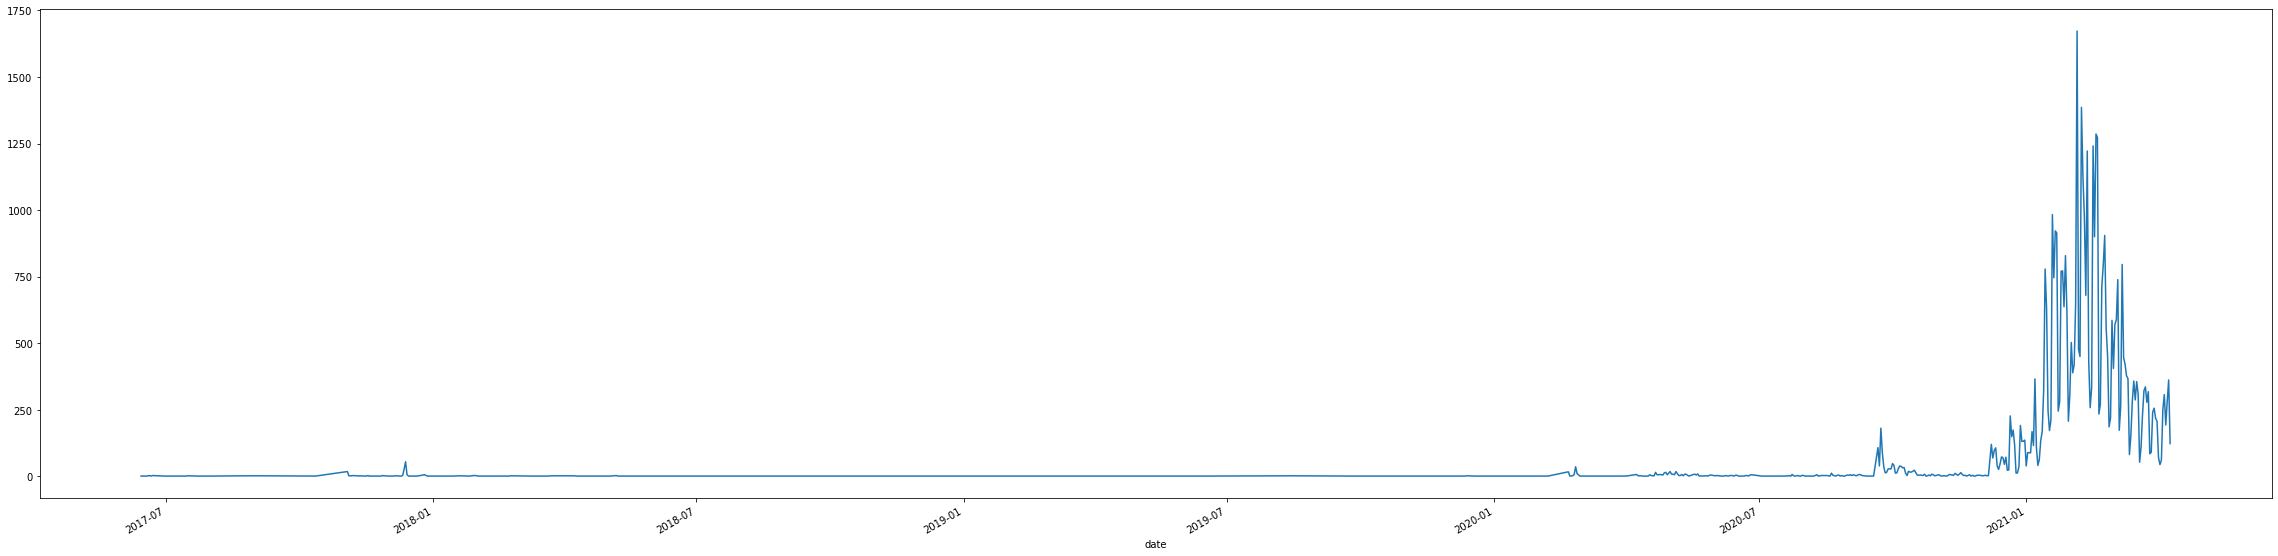

In [ ]:
df_read.groupby('date')['tweet'].count().plot(figsize=(40,10))

In [ ]:
df_read['date']

0       2021-04-10
1       2021-04-10
2       2021-04-10
3       2021-04-10
4       2021-04-10
           ...    
48190   2017-06-20
48191   2017-06-18
48192   2017-06-17
48193   2017-06-15
48194   2017-06-14
Name: date, Length: 48195, dtype: datetime64[ns]

In [ ]:
df_read[['date','tweet']]

,date,tweet
0,2021-04-10,$WSGF don't miss these. 20 days free trial💰💸...
1,2021-04-10,$RGBP 👀 $EEENF $WDLF $IMTL $PVDG $GMPW $FTEG $...
2,2021-04-10,"Docket Entry 18 ""Order Extending Time for"" is ..."
3,2021-04-10,@GlobalTechGTLL where you at!!! I am a long te...
4,2021-04-10,$usei $ppje $gtll $cbbt $wdlf I have earned a ...
...,...,...
48190,2017-06-20,$GTLL Nice benhor! Taking Goals on a few mysel...
48191,2017-06-18,$VOC This is a must join site! #InvestorsHango...
48192,2017-06-17,IF ANY STOCK CAN RUN TO $1 $ELED HAS ALL INGRE...
48193,2017-06-15,IF ANY STOCK CAN RUN TO $1 $ELED HAS ALL INGRE...


In [ ]:
#df[df['Time']=='2021-04-10']
df = df.reset_index()

In [ ]:
df

,Time,Tweet
0,2021-04-10,NeveinAmer @MentalHealthVR $GTLL reached 0.035...
1,2021-04-09,Praying for monster green Friday!!!! @AlexDela...
2,2021-04-08,GTLL
3,2021-04-07,MentalHealthVR $GTLL and I am in for the ride
4,2021-04-06,INCC is going to the moon! Huge $HCMC $BRTX $...
...,...,...
447,2017-06-20,GTLL Nice benhor! Taking Goals on a few myself...
448,2017-06-18,VOC This is a must join site! #InvestorsHangou...
449,2017-06-17,IF ANY STOCK CAN RUN TO $1 $ELED HAS ALL INGRE...
450,2017-06-15,IF ANY STOCK CAN RUN TO $1 $ELED HAS ALL INGRE...
